# Classification – Prediction of House Grade

### Problem statement:
Property buyers has different requirements so we need to determine the garde of the house cosidering different parameters.

### Application of predicting the garde of house:
It helps the agent in identifying the type of the house customer looking for.

While selecting the house price is the main factor,Grading differentiate the price of the house based upon grades.

### Business Objective
Build a predictive model to determine the Grade of house (The grades are A,B,C,D, and E)

### Data Dictionary
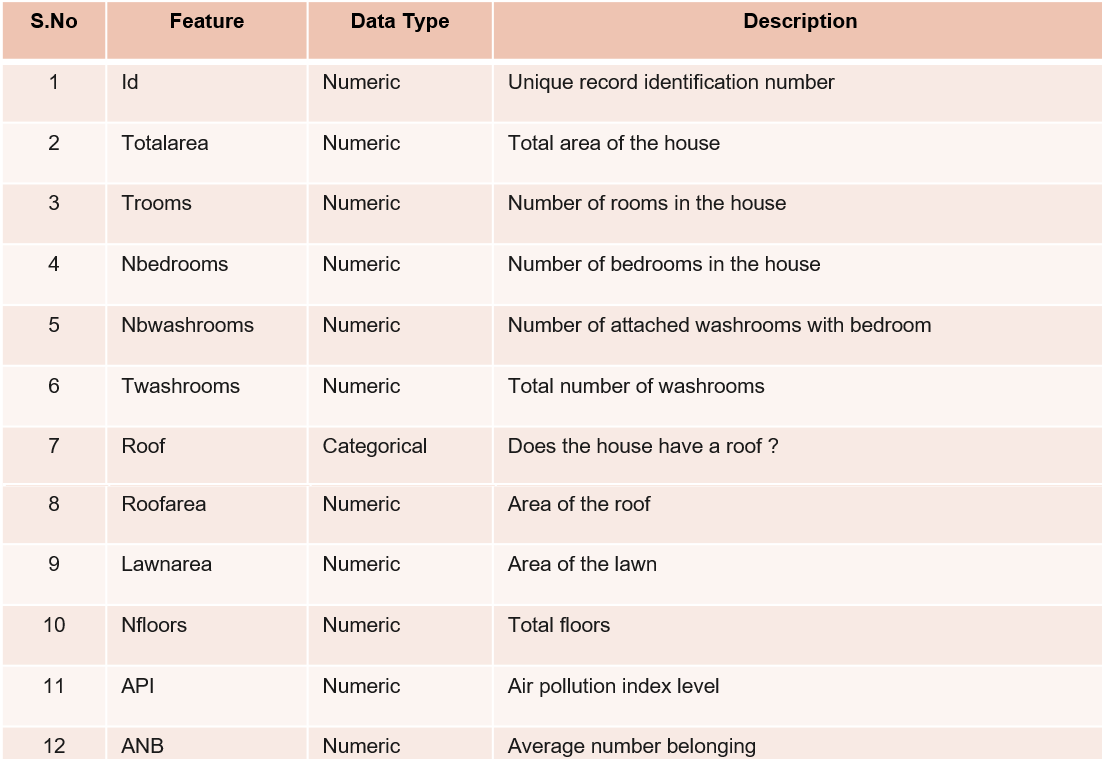

## Import Modules

In [1]:
# importing libraries
import numpy as np                                               # for numerical operations
import pandas as pd                                              # to craete data structures
import matplotlib.pyplot as plt                                  # for visualisation
import seaborn as sns                                            # for visualisation                              
from sklearn import preprocessing                                # for preprocessing the data
from sklearn.preprocessing import MinMaxScaler                   # for scaling the data to make in one range
from sklearn.model_selection import train_test_split             # for splitting the data into train and test set
from sklearn import metrics                                      # for evaluation of model
import warnings                                                  # to remove warnings
warnings.simplefilter(action='ignore')                           # removing warnings
from sklearn.model_selection import cross_val_score              # for cross validation score values
from numpy import mean                                           # for mean the values
from sklearn.linear_model import LogisticRegression              # for model building
from sklearn.tree import DecisionTreeClassifier                  # for model building
from sklearn.ensemble import RandomForestClassifier              # for model building
from sklearn.ensemble import AdaBoostClassifier                  # for model building
from sklearn.neighbors import KNeighborsClassifier               # for model building
from sklearn.svm import SVC                                      # for model building
from sklearn.naive_bayes import GaussianNB                       # for model building
from sklearn.ensemble import StackingClassifier                  # for model building
from sklearn.model_selection import RepeatedStratifiedKFold      # repeated strtified k fold means apply stratified kfold  technique use 'n' times with diffrent randomisation
from sklearn.model_selection import cross_val_predict            # for predicting values
from sklearn.metrics import ConfusionMatrixDisplay               # for plotting confusion matrix
from sklearn.metrics import confusion_matrix                     # for creating confusion matrix of model

## Loading the dataset

In [2]:
# Loading data file
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

# preview the data file
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


## Preprocessing the dataset

In [3]:
# dropping unecessary features
df.drop(['Id'], axis = 1, inplace = True) 
df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
# structure of data
print('Shape of data is',df.shape)

Shape of data is (3000, 13)


In [5]:
# summary of dataset
print('Statistical description of dataset are as follows :')
df.describe()

Statistical description of dataset are as follows :


,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [6]:
# for finding null values count
print('Count of null values of all the features is as follows :')
df.isnull().sum()

Count of null values of all the features is as follows :


Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [7]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


In [8]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Area(total)         71
Trooms               5
Nbedrooms            7
Nbwashrooms          8
Twashrooms           9
roof                 2
Roof(Area)          52
Lawn(Area)          51
Nfloors              7
API                 61
ANB                  6
Expected price    1647
Grade                5
dtype: int64

In [9]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

# print the categorical columns with unique element value counts
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print('-'*40)

roof
YES    1543
NO     1457
Name: roof, dtype: int64
----------------------------------------
Grade
D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64
----------------------------------------


### Exploratory Data Analysis

In [10]:
# creating list of numeric datatype columns
num=[]
for i in df.select_dtypes('int64').columns:
    num.append(i)
num

['Area(total)',
 'Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'Roof(Area)',
 'Lawn(Area)',
 'Nfloors',
 'API',
 'ANB',
 'Expected price']

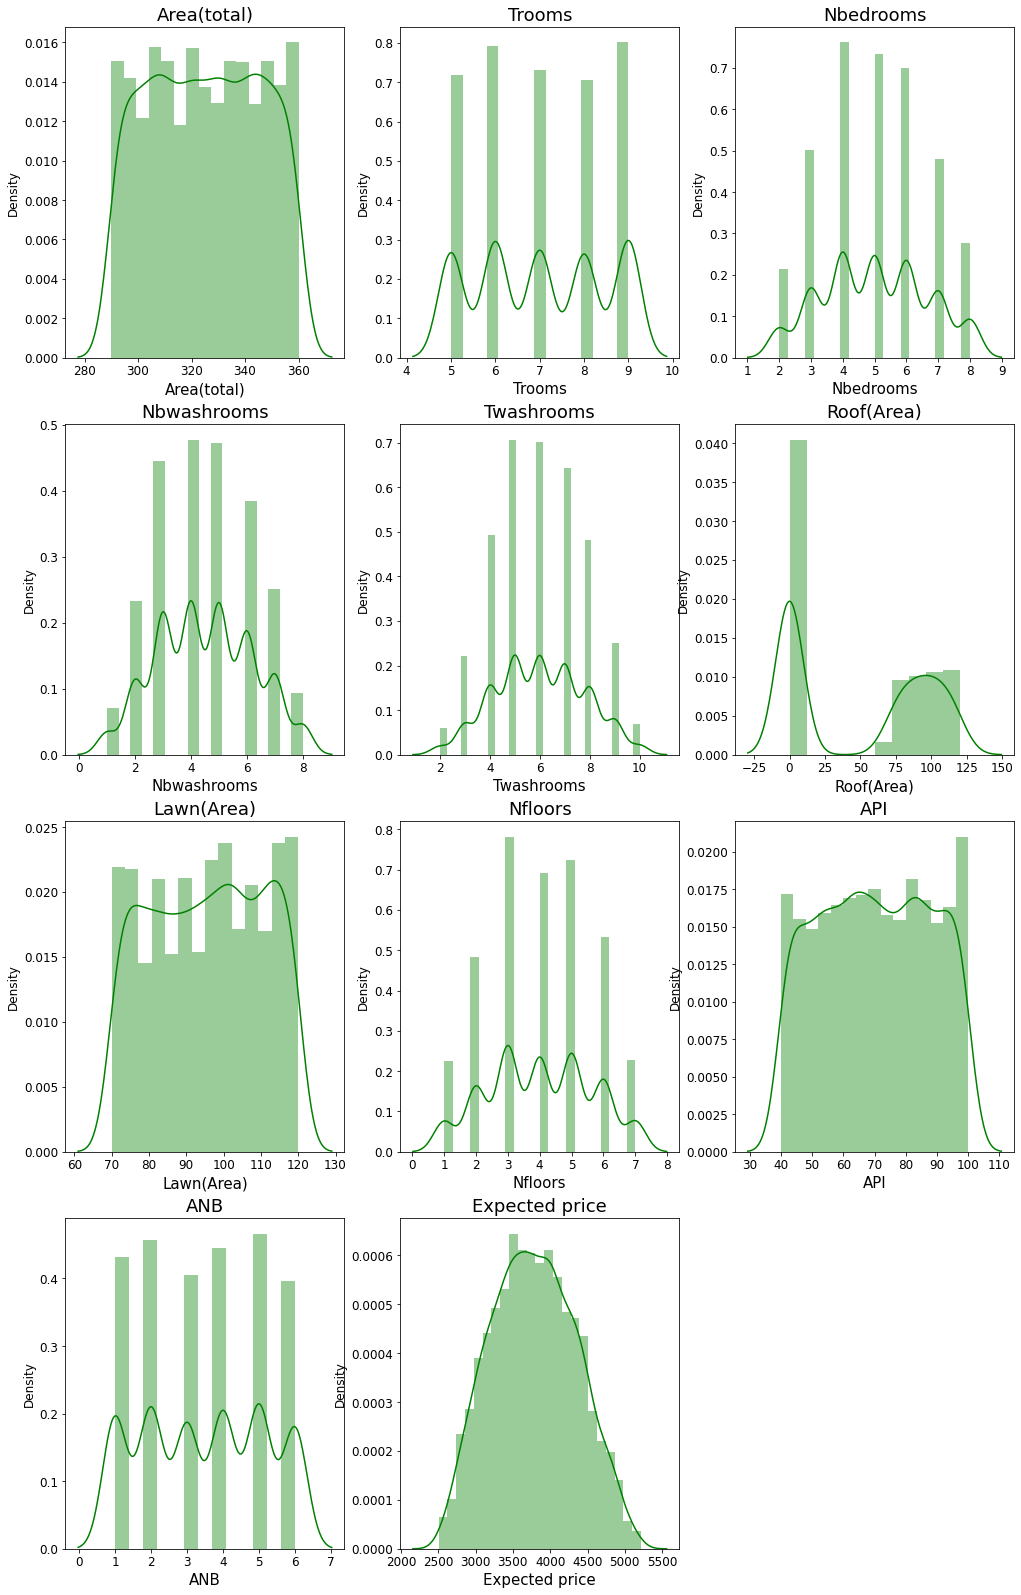

In [11]:
# visualizing distribution of data of all numerical features 
fig,ax = plt.subplots(figsize=(17,28))
c=1
for i in num:
    plt.subplot(4,3,c)
    sns.distplot(df[i],color='g')
    plt.title(i,fontsize=18)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Density',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

#### CONCLUSION :
1. Total Area, Total Rooms, Lawn area, Air Pollution Index and ANB shows almost uniform distribution in the data.
2. Bedrooms, Bedrooms with Washrooms, Total Washrooms, Floors and Expected Price shows almost normal distribution in data.

In [12]:
# creating list of object datatype columns
obj=[]
for i in df.select_dtypes('object').columns:
    obj.append(i)
obj

['roof', 'Grade']

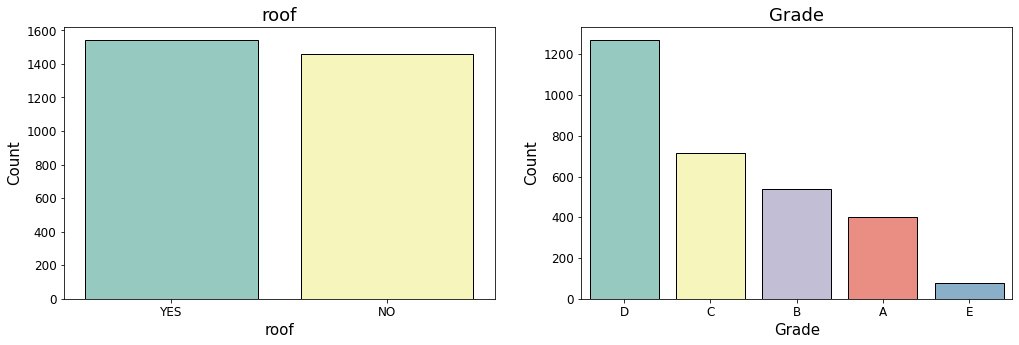

In [13]:
# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,5))
c=1
for i in obj:
    plt.subplot(1,2,c)
    sns.countplot(df[i], order = df[i].value_counts().index, palette='Set3', edgecolor='k')
    plt.title(i,fontsize=18)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

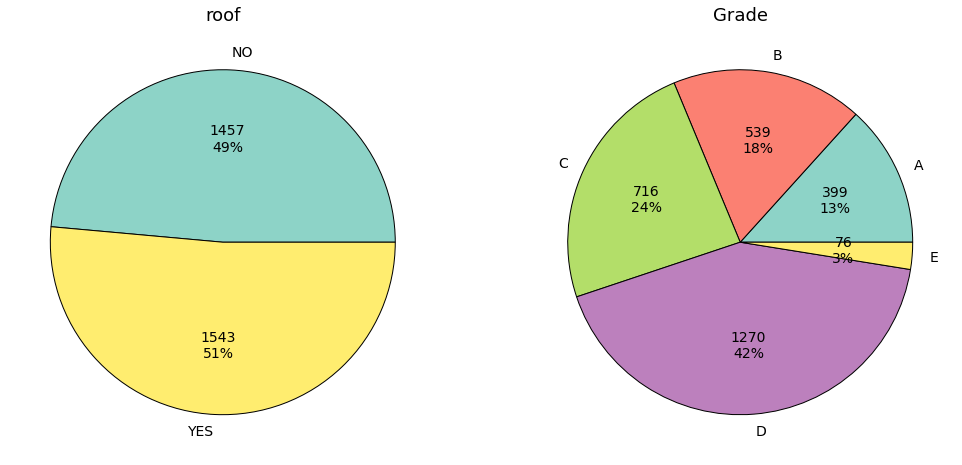

In [14]:
# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,10))

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
c=1
for i in obj:
    plt.subplot(1,2,c)
    df.groupby(df[i]).size().plot(kind='pie',autopct=label_function, textprops={'fontsize': 14},cmap='Set3',
                                  wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
    plt.title(i,fontsize=18)
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

#### CONCLUSION :
1. Almost 50% of houses have the terrace and remaining 50% dosen't have any terrace.
2. Most of the houses are rated as 'D' i.e. around 42% of total houses and least are rated as 'E' i.e. around 3% of total houses.

### Label Encoding

In [15]:
# converting non-numeric columns into categorical datatype column
for i in obj:
      df[i]=df[i].astype('category')
        
# checking datatypes of all columns after coverting datatype into categorical columns
print('Datatype of all columns in dataset:')
df.info()

Datatype of all columns in dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Area(total)     3000 non-null   int64   
 1   Trooms          3000 non-null   int64   
 2   Nbedrooms       3000 non-null   int64   
 3   Nbwashrooms     3000 non-null   int64   
 4   Twashrooms      3000 non-null   int64   
 5   roof            3000 non-null   category
 6   Roof(Area)      3000 non-null   int64   
 7   Lawn(Area)      3000 non-null   int64   
 8   Nfloors         3000 non-null   int64   
 9   API             3000 non-null   int64   
 10  ANB             3000 non-null   int64   
 11  Expected price  3000 non-null   int64   
 12  Grade           3000 non-null   category
dtypes: category(2), int64(11)
memory usage: 264.1 KB


In [16]:
# creating list of categorical datatype columns 
category=[]
for i in df.select_dtypes('category').columns:
      category.append(i)

# label encoder technique to convert categorical column to numerical type
for i in category:
      df[i+str('_encode')] = preprocessing.LabelEncoder().fit_transform(df[i])
df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,Grade_encode
0,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3


In [17]:
# printing which label is assigned to which number 
for i in category:
    print(pd.DataFrame({str(i):df[i].unique(), i+str('_encode'):df[i+str('_encode')].unique()})
          .sort_values(i+str('_encode')))
    print('-'*25)

  roof  roof_encode
0   NO            0
1  YES            1
-------------------------
  Grade  Grade_encode
3     A             0
2     B             1
1     C             2
0     D             3
4     E             4
-------------------------


### Feature Scaling

In [18]:
# feature scaling except target feature 'grade' using minmax scaler
numerics = ['int64','int32']   # datatype
df1 = df.select_dtypes(include=numerics)
df1 = df1.loc[:, df1.columns != 'Grade_encode']
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df1.to_numpy()),columns=df1.columns)  # using minmax scaler
df_scaled['Grade_encode']=df['Grade_encode']
print('Dataframe with minmax scaler values is as follows :')
df_scaled.head()   # preview of dataframe after scaling

Dataframe with minmax scaler values is as follows :


,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.0,3
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1.0,3
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1.0,2
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1.0,3
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.0,3


### Feature Selection

In [19]:
# correlation among numerical features
df_scaled.corr().style.background_gradient(cmap='PuRd')

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000
ANB,-0.010846,0.007321,0.015403,0.008475,0.016492,-0.015529,0.025751,0.020614,-0.025694,1.000000,0.015583,-0.020511,-0.024025


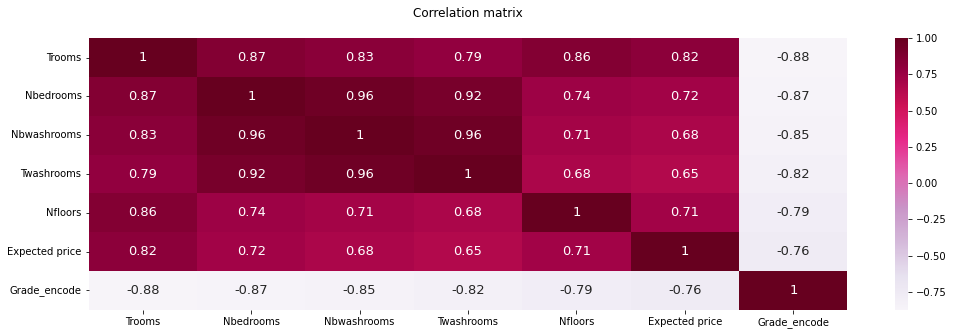

In [20]:
# Selecting Features having Correlation greater than 0.75
select = []
for i in df_scaled:
      if abs(df_scaled[i].corr(df_scaled['Grade_encode']))>=0.75 :
            select.append(i)

# plotting heatmap among selected features
fig, ax = plt.subplots(figsize=(17,5)) 
ax =(sns.heatmap(df_scaled[select]
             .corr(), annot = True, cmap="PuRd",annot_kws={"size": 13})
.set(title = "Correlation matrix\n"))
plt.show()

In [21]:
# final dataset for model building
df_final = df_scaled[select]
df_final.head()

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade_encode
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251,3
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944,3
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702,2
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301,3
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732,3


## Model Building

### Spliting Data into train and test

In [22]:
# Creating test and training datasets
df_train, df_test = train_test_split(df_final,train_size = 0.8)

# specifying x and y
X_train = df_train.drop(columns='Grade_encode', axis =1)
Y_train = df_train['Grade_encode']
X_test = df_test.drop(columns='Grade_encode', axis =1)
Y_test = df_test['Grade_encode']

print('Size of training dataset from input data is', Y_train.shape[0])
print('Size of test dataset from input data is', Y_test.shape[0])

Size of training dataset from input data is 2400
Size of test dataset from input data is 600


#### Using Stratified K-Fold cross validation method

In [23]:
# creating list to store evaluation score of the model
result_acc, result_pre, result_rec, result_f1 = list(), list(), list(), list()

# creating function to build model and to evaluate it
def MODEL(model, X_train, Y_train, X_test, Y_test):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    acc = cross_val_score(model, X_train, Y_train, cv=cv, n_jobs=-1, error_score='raise')
    pre = cross_val_score(model, X_train, Y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
    rec = cross_val_score(model, X_train, Y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
    f1 = cross_val_score(model, X_train, Y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

    clf = model.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    
    result_acc.append(acc)
    result_pre.append(pre)
    result_rec.append(rec)
    result_f1.append(f1)
    
    print('Accuaracy-Score: {} %'.format(round(mean(acc)*100,2)))
    print('Precision-Score: {} %'.format(round(mean(pre)*100,2)))
    print('Recall-Score: {} %'.format(round(mean(rec)*100,2)))
    print('F1-Score: {} %'.format(round(mean(f1)*100,2)))
    print('Confusion Matrix :\n',confusion_matrix(Y_test,Y_pred))
    cm= confusion_matrix(Y_test,Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(cm)
    cm_display.plot()
    plt.show()

### Model 1 : Logistic Regression Model

Accuaracy-Score: 80.47 %
Precision-Score: 78.24 %
Recall-Score: 80.47 %
F1-Score: 79.1 %
Confusion Matrix :
 [[ 74  14   0   0   0]
 [  5  82  22   0   0]
 [  0  20  84  33   0]
 [  0   0  17 241   0]
 [  0   0   0   8   0]]


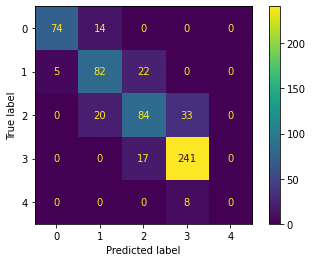

In [24]:
MODEL(LogisticRegression(), X_train, Y_train, X_test, Y_test)

### Model 2 : Decision Tree Classification Model

Accuaracy-Score: 70.62 %
Precision-Score: 71.1 %
Recall-Score: 70.6 %
F1-Score: 70.64 %
Confusion Matrix :
 [[ 65  23   0   0   0]
 [ 16  67  24   2   0]
 [  0  23  80  33   1]
 [  0   1  32 215  10]
 [  0   0   0   5   3]]


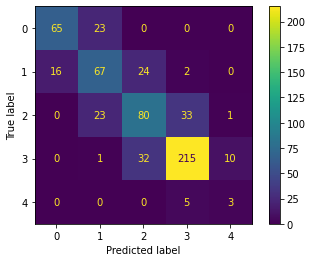

In [25]:
MODEL(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

### Model 3 : Random Forest Classification Model

Accuaracy-Score: 74.26 %
Precision-Score: 73.54 %
Recall-Score: 73.93 %
F1-Score: 73.72 %
Confusion Matrix :
 [[ 71  16   1   0   0]
 [ 10  75  22   2   0]
 [  0  17  93  27   0]
 [  0   0  31 224   3]
 [  0   0   0   5   3]]


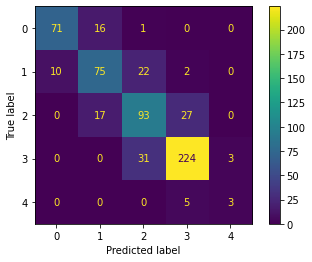

In [26]:
MODEL(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

### Model 4 : Adaptive Boosting Classification Model

Accuaracy-Score: 61.03 %
Precision-Score: 61.73 %
Recall-Score: 61.03 %
F1-Score: 58.14 %
Confusion Matrix :
 [[  0  88   0   0   0]
 [  0  93  16   0   0]
 [  0  27  52  58   0]
 [  0   0   6 194  58]
 [  0   0   0   0   8]]


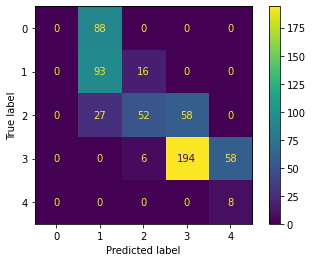

In [27]:
MODEL(AdaBoostClassifier(), X_train, Y_train, X_test, Y_test)

### Model 5 : Stacking Classification Model

Accuaracy-Score: 70.97 %
Precision-Score: 71.56 %
Recall-Score: 70.96 %
F1-Score: 70.87 %
Confusion Matrix :
 [[ 74  14   0   0   0]
 [ 17  67  22   3   0]
 [  0  26  77  34   0]
 [  0   0  27 222   9]
 [  0   0   0   6   2]]


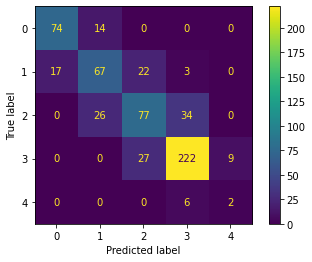

In [28]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = DecisionTreeClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

MODEL(get_stacking(), X_train, Y_train, X_test, Y_test)

### Evaluation of models

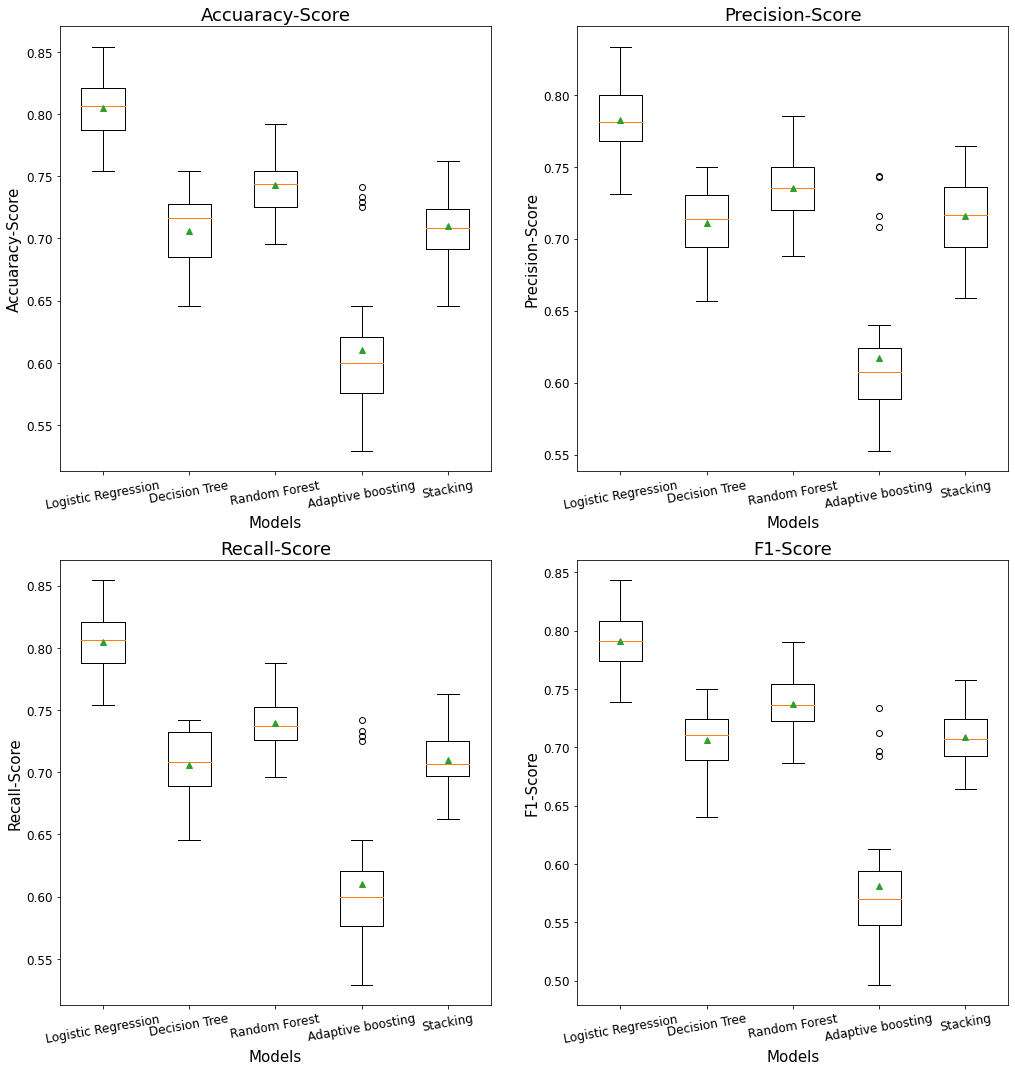

In [29]:
# creating list to help in visualization of model evaluation score
names=['Logistic Regression','Decision Tree','Random Forest','Adaptive boosting','Stacking']
results = [result_acc, result_pre, result_rec, result_f1]
scores=['Accuaracy-Score','Precision-Score','Recall-Score','F1-Score']

# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,18))
c=1
for i in range(len(results)):
    plt.subplot(2,2,c)
    plt.boxplot(results[i], labels=names, showmeans=True)
    plt.xlabel('Models', fontsize = 15)
    plt.ylabel(scores[i], fontsize = 15)
    plt.title(scores[i], fontsize = 18)
    plt.xticks(fontsize = 12, rotation=10)
    plt.yticks(fontsize = 12)
    c+=1

#### CONCLUSION :
1. Among all models 'Logistic Regression Model' gives the best performance. Having highest scores among all models.
    
    Logistic Regression Model :
        a. Accuaracy-Score: 80.83 %
        b. Precision-Score: 78.64 %
        c. Recall-Score: 80.83 %
        d. F1-Score: 79.5 %

#### Using 'Logistic Regression Model' predicting test values from grades of houses

##### a. Training model

In [30]:
# training model
model = LogisticRegression()
clf = model.fit(X_train,Y_train)

##### b. Predicting grades of houses

In [31]:
# predicting values
Y_pred = clf.predict(X_test)
print('Predicted values of grade of houses are as follows:')
Y_pred

Predicted values of grade of houses are as follows:


array([1, 2, 3, 1, 3, 2, 2, 0, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3,
       2, 3, 3, 0, 1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 2, 2, 3, 0, 3, 1, 3, 2,
       2, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 1, 3, 1, 0, 3, 2, 2, 3, 0, 3, 3,
       2, 3, 2, 3, 1, 1, 3, 3, 3, 2, 3, 2, 3, 0, 3, 3, 3, 1, 3, 0, 1, 1,
       3, 3, 3, 2, 2, 1, 3, 0, 2, 2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 0,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 2, 1, 2, 1, 3, 2, 0, 0, 3, 3, 1, 0, 2,
       3, 3, 1, 1, 3, 2, 2, 3, 3, 3, 1, 3, 1, 2, 3, 0, 1, 3, 3, 0, 3, 2,
       2, 2, 1, 3, 3, 3, 3, 1, 3, 1, 3, 0, 3, 3, 3, 2, 2, 0, 3, 3, 3, 3,
       0, 2, 2, 3, 2, 3, 3, 1, 0, 1, 1, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 0, 2, 0, 2, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 2, 1, 3, 3, 1, 1, 0, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 2, 2, 2, 2, 2, 1, 3, 1, 2, 3, 3, 1, 1, 0, 2, 0, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 3, 3, 3,
       1, 0, 1, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1,

##### c. Plotting actual and predicted values of first 50 datapoints

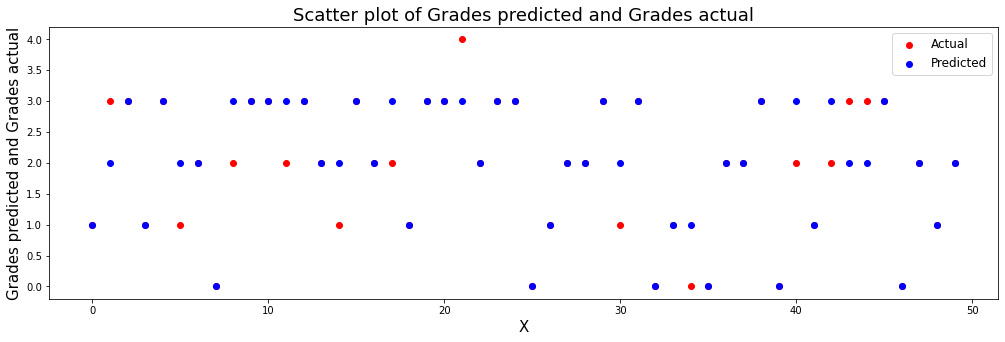

In [32]:
# plotting actual and pred values of first 50 datapoints 
x_1 = list(np.arange(0,len(Y_test.iloc[:50])))
plt.figure(figsize=(17,5))
plt.scatter(x_1,Y_test.iloc[:50],color='red')
plt.scatter(x_1,pd.Series(Y_pred).iloc[:50],color='blue')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Grades predicted and Grades actual' , fontsize = 15)
plt.legend(['Actual','Predicted'],loc="upper right",fontsize = 12)
plt.title('Scatter plot of Grades predicted and Grades actual' , fontsize = 18);